<a href="https://colab.research.google.com/github/yoshih8/recipes/blob/main/Prepare_the_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --ignore-installed Pillow==9.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.9 MB/s eta 0:00:00


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 22.0 MB/s eta 0:00:00


In [ ]:
pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 13.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io


import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.utils as vutils

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]


dataroot = '/content/drive/MyDrive/Images'
ref = '/content/drive/MyDrive/FETAL_PLANES_DB_data.csv'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'Device: {device}')

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 500) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)


Device: cuda:0
Random Seed:  999


# Prepare dataset

In [ ]:
class FetalPlaneDataset(Dataset):
    """Fetal Plane dataset."""

    def __init__(self, root_dir, ref, 
                 plane, 
                 brain_plane=None, 
                 us_machine=None, 
                 operator_number=None, 
                 transform=None
                ):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
            plane: 'Fetal brain'; 'Fetal thorax'; 'Maternal cervix'; 'Fetal femur'; 'Fetal thorax'; 'Other'
            brain_plane: 'Trans-ventricular'; 'Trans-thalamic'; 'Trans-cerebellum'
            us_machine: 'Voluson E6';'Voluson S10'
            operator_number: 'Op. 1'; 'Op. 2'; 'Op. 3';'Other'
            
        return image
        """
        self.root_dir = root_dir
        self.ref = pd.read_csv(ref, sep=';')
        self.ref = self.ref[self.ref['Plane'] == plane]
        if plane == 'Fetal brain':
            self.ref = self.ref[self.ref['Brain_plane'] == brain_plane]
        if us_machine is not None:
            self.ref = self.ref[self.ref['US_Machine'] == us_machine]
        if operator_number is not None:
            self.ref = self.ref[self.ref['Operator'] == operator_number]

        self.transform = transform

    def __len__(self):
        return len(self.ref)

    def __getitem__(self, idx):
        
        #print(f'idx: {idx} \n')
        #print(f'self.ref.iloc[idx, 0]: {self.ref.iloc[idx, 0]} \n')
       
        img_name = os.path.join(self.root_dir,
                                self.ref.iloc[idx, 0] + '.png')
        #print(img_name)
        
        image = io.imread(img_name)
        
        #print(type(image))
        #print(image.dtype)

        if self.transform:
            image = self.transform(image)

        return image

# Prepare training dataset

lenght 147
torch.Size([8, 1, 128, 128])


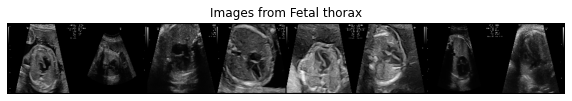

In [ ]:
# Root directory for dataset
#dataroot = FULL_DATA_REPO_PATH + "fetal_planes/Images"
#ref = FULL_DATA_REPO_PATH + "FETAL_PLANES_DB_data.csv"

##Plane
# plane = 'Fetal brain'
plane = 'Fetal thorax'
#plane = 'Maternal cervix'
# plane = 'Fetal femur'
# plane = 'Fetal thorax'
# plane = 'Other'

#operator_number = None
#operator_number = 'Op. 1'
#operator_number = 'Op. 2'
#operator_number = 'Op. 3'
operator_number = 'Other'

us_machine = None
#us_machine = 'Voluson E6'
#us_machine = 'Voluson S10'

brain_plane = None
# brain_plane = 'Trans-ventricular'; us_machine = 'Voluson E6' ###len: 408 
#brain_plane = 'Trans-ventricular';us_machine = 'Voluson S10' ###len: 59 
#brain_plane = 'Trans-ventricular'; us_machine = 'Aloka' ###len: 112 
# brain_plane = 'Trans-ventricular'; us_machine = 'Other' ###len: 18

# brain_plane = 'Trans-thalamic'; us_machine = 'Voluson E6' ###len: 1072 
# brain_plane = 'Trans-thalamic'; us_machine = 'Voluson S10' ###len: 123 
# brain_plane = 'Trans-thalamic'; us_machine = 'Aloka' ###len: 360 
# brain_plane = 'Trans-thalamic'; us_machine = 'Other' ###len: 83 

# brain_plane = 'Trans-cerebellum'; us_machine = 'Voluson E6' ###len: 492 
# brain_plane = 'Trans-cerebellum'; us_machine = 'Voluson S10' ###len: 68 
# brain_plane = 'Trans-cerebellum'; us_machine = 'Aloka' ###len: 134 
# brain_plane = 'Trans-cerebellum'; us_machine = 'Other' ###len: 20 


#image_size = 28
# image_size = 32
#image_size = 64
image_size = 128
#image_size = 512

# Number of workers for dataloader 设置成0避免报错
workers = 1

# Batch size during training
#batch_size = 2
#batch_size = 3
#batch_size = 4
batch_size = 8
#batch_size = 16
#atch_size = 128

SHUFFLE_T = True
SHUFFLE_F = False

#preprocess
transform_operations = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
                        #mt.RandRotate(range_x=0.1, prob=0.5),
                        #mt.RandZoom(prob=0.5, min_zoom=1, max_zoom=1.1),
                        #mt.Resize([image_size, image_size]),
                        transforms.Resize([image_size, image_size]),# Resize
                        transforms.Normalize((0.5,), (0.5,)), #mean=0.5, std=0.5
                        ])

dataset = FetalPlaneDataset(root_dir=dataroot, 
                            ref=ref,
                            plane=plane,
                            brain_plane=brain_plane,
                            us_machine=us_machine,
                            operator_number=operator_number,
                            transform=transform_operations)

number_of_images = dataset.__len__()
print(f'lenght {number_of_images}')

#train_dataloader
# Create a dataloader from the dataset to serve up the images in batches
train_dataloader = DataLoader(dataset, 
                        batch_size=batch_size,
                        shuffle=SHUFFLE_T,
                        drop_last=True) 
                        #num_workers=workers)

# Plot some training images
real_batch = next(iter(train_dataloader))
print(real_batch.shape)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.title(f'Images from {plane}')
grid_images=vutils.make_grid(real_batch.to(device)[:64], nrow=8, padding=2, normalize=True)
plt.imshow(np.transpose(grid_images.cpu(),(1,2,0)))
plt.show()

In [ ]:
dataset.ref.iloc[:,0]

1322     Patient00216_Plane6_1_of_3
1323     Patient00216_Plane6_2_of_3
1324     Patient00216_Plane6_3_of_3
1424     Patient00305_Plane6_1_of_3
1425     Patient00305_Plane6_2_of_3
                    ...            
12371    Patient01786_Plane6_1_of_1
12376    Patient01787_Plane6_1_of_2
12377    Patient01787_Plane6_2_of_2
12387    Patient01789_Plane6_1_of_1
12399    Patient01792_Plane6_1_of_1
Name: Image_name, Length: 147, dtype: object

Create a list which includes the all images we selected.

In [ ]:
all_images = []
for idx in range(0, number_of_images):
    all_images.append(dataset.ref.iloc[idx, 0])

print(all_images)
print(len(all_images))

['Patient00216_Plane6_1_of_3', 'Patient00216_Plane6_2_of_3', 'Patient00216_Plane6_3_of_3', 'Patient00305_Plane6_1_of_3', 'Patient00305_Plane6_2_of_3', 'Patient00305_Plane6_3_of_3', 'Patient00644_Plane6_1_of_1', 'Patient00686_Plane6_1_of_1', 'Patient00692_Plane6_1_of_2', 'Patient00692_Plane6_2_of_2', 'Patient00696_Plane6_1_of_2', 'Patient00696_Plane6_2_of_2', 'Patient00698_Plane6_1_of_1', 'Patient00708_Plane6_1_of_2', 'Patient00708_Plane6_2_of_2', 'Patient00709_Plane6_1_of_1', 'Patient00710_Plane6_1_of_1', 'Patient00724_Plane6_1_of_2', 'Patient00724_Plane6_2_of_2', 'Patient00776_Plane6_1_of_1', 'Patient00815_Plane6_1_of_3', 'Patient00815_Plane6_2_of_3', 'Patient00815_Plane6_3_of_3', 'Patient00816_Plane6_1_of_1', 'Patient00840_Plane6_1_of_1', 'Patient00841_Plane6_1_of_2', 'Patient00841_Plane6_2_of_2', 'Patient00930_Plane6_1_of_3', 'Patient00930_Plane6_2_of_3', 'Patient00930_Plane6_3_of_3', 'Patient00951_Plane6_1_of_1', 'Patient00962_Plane6_1_of_2', 'Patient00962_Plane6_2_of_2', 'Patient0

Shuffle the images in this list

In [ ]:
random.shuffle(all_images)  # randomly shuffles the ordering of filenames. random seed = 999
print(all_images)

['Patient01475_Plane6_2_of_2', 'Patient01698_Plane6_3_of_3', 'Patient01625_Plane6_1_of_1', 'Patient01471_Plane6_1_of_2', 'Patient01402_Plane6_1_of_1', 'Patient01711_Plane6_1_of_3', 'Patient01541_Plane6_1_of_2', 'Patient01372_Plane6_1_of_2', 'Patient01151_Plane6_1_of_3', 'Patient01616_Plane6_1_of_1', 'Patient01433_Plane6_3_of_5', 'Patient01456_Plane6_1_of_1', 'Patient00216_Plane6_1_of_3', 'Patient01500_Plane6_1_of_1', 'Patient01271_Plane6_1_of_2', 'Patient00815_Plane6_3_of_3', 'Patient01778_Plane6_2_of_2', 'Patient01695_Plane6_1_of_1', 'Patient01648_Plane6_2_of_2', 'Patient00951_Plane6_1_of_1', 'Patient00692_Plane6_1_of_2', 'Patient01475_Plane6_1_of_2', 'Patient00709_Plane6_1_of_1', 'Patient01443_Plane6_1_of_1', 'Patient01761_Plane6_3_of_5', 'Patient01634_Plane6_1_of_1', 'Patient01710_Plane6_1_of_2', 'Patient01433_Plane6_2_of_5', 'Patient01395_Plane6_1_of_1', 'Patient01588_Plane6_1_of_2', 'Patient01680_Plane6_1_of_1', 'Patient01652_Plane6_1_of_1', 'Patient00962_Plane6_2_of_2', 'Patient0

**Split the dataset into train and test dataset**

In [ ]:
train_dataset = 0.5

split_1 = int(train_dataset * len(all_images))

train_images = all_images[:split_1]
test_images = all_images[split_1:]

print(split_1)

print(train_images)
print(test_images)

print(len(train_images))
print(len(test_images))

73
['Patient01475_Plane6_2_of_2', 'Patient01698_Plane6_3_of_3', 'Patient01625_Plane6_1_of_1', 'Patient01471_Plane6_1_of_2', 'Patient01402_Plane6_1_of_1', 'Patient01711_Plane6_1_of_3', 'Patient01541_Plane6_1_of_2', 'Patient01372_Plane6_1_of_2', 'Patient01151_Plane6_1_of_3', 'Patient01616_Plane6_1_of_1', 'Patient01433_Plane6_3_of_5', 'Patient01456_Plane6_1_of_1', 'Patient00216_Plane6_1_of_3', 'Patient01500_Plane6_1_of_1', 'Patient01271_Plane6_1_of_2', 'Patient00815_Plane6_3_of_3', 'Patient01778_Plane6_2_of_2', 'Patient01695_Plane6_1_of_1', 'Patient01648_Plane6_2_of_2', 'Patient00951_Plane6_1_of_1', 'Patient00692_Plane6_1_of_2', 'Patient01475_Plane6_1_of_2', 'Patient00709_Plane6_1_of_1', 'Patient01443_Plane6_1_of_1', 'Patient01761_Plane6_3_of_5', 'Patient01634_Plane6_1_of_1', 'Patient01710_Plane6_1_of_2', 'Patient01433_Plane6_2_of_5', 'Patient01395_Plane6_1_of_1', 'Patient01588_Plane6_1_of_2', 'Patient01680_Plane6_1_of_1', 'Patient01652_Plane6_1_of_1', 'Patient00962_Plane6_2_of_2', 'Patie

Store the train and test dataset into specific folders.

In [ ]:
import shutil

folder_name_train = f"/content/drive/MyDrive/Original_Images/Train_{plane}_{operator_number}_{us_machine}_{brain_plane}_{image_size}"  
folder_name_test = f"/content/drive/MyDrive/Original_Images/Test_{plane}_{operator_number}_{us_machine}_{brain_plane}_{image_size}"  


if not os.path.exists(folder_name_train):
    os.mkdir(folder_name_train)    #make new folder
if not os.path.exists(folder_name_test):
    os.mkdir(folder_name_test)    #make new folder


for id1 in range(0, len(train_images)):   # copy the train images into the folder
    shutil.copy(os.path.join(dataset.root_dir, train_images[id1] + '.png'), folder_name_train)

for id2 in range(0, len(test_images)):   # copy the test images into the folder
    shutil.copy(os.path.join(dataset.root_dir, test_images[id2] + '.png'), folder_name_test)

In [ ]:
os.path.join(dataset.root_dir, test_images[2] + '.png')

print(sum(os.path.isfile(os.path.join(folder_name_train, name)) for name in os.listdir(folder_name_train)))
print(sum(os.path.isfile(os.path.join(folder_name_test, name)) for name in os.listdir(folder_name_test)))

73
74
